In [7]:
%load_ext autoreload
%autoreload 2

from imports import *
from dynamics import *
from model import *
from train import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


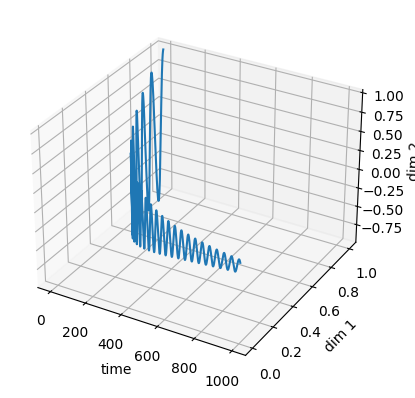

In [8]:
data = dampened_oscillator(m=1.0, c=np.array([100.0, 0.1]), k=np.array([10.0, 10.0]))

plot_3d(data.cpu().numpy())

100%|██████████| 10/10 [00:14<00:00,  1.49s/it]


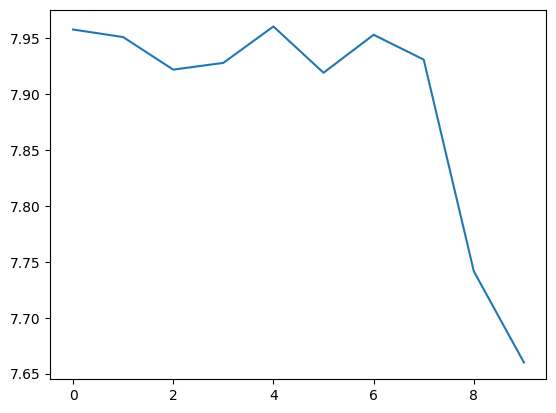

In [9]:
model = EBM(2).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

losses = []

for e in tqdm(range(10)):
    loss = epoch(iterations=10, model=model, optimizer=optimizer, data=data, bs=100, num_negative_samples=20)
    losses.append(loss)

plt.plot(losses)

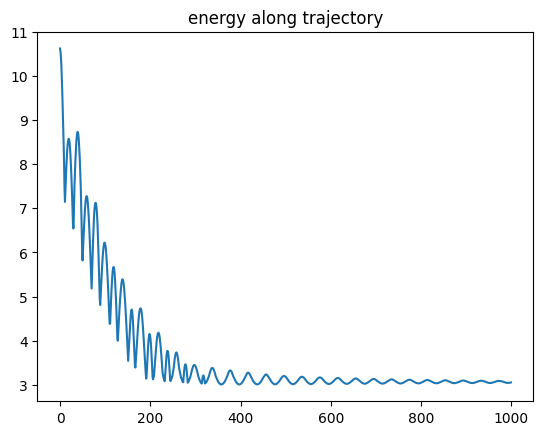

In [10]:
plot_energy_along_trajectory(model, data)

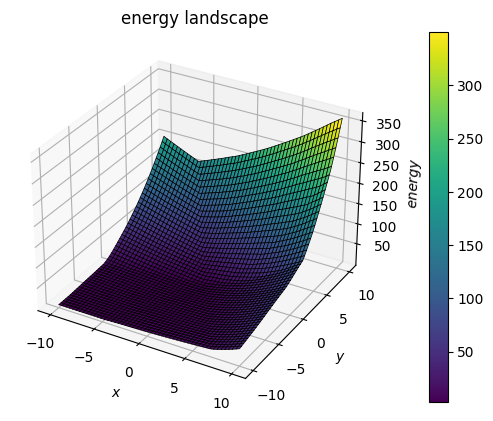

In [11]:
plot_energy_landscape(model)